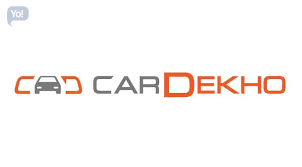

###  By Naresh kumar

** importing libaries

In [1]:
import numpy as np
import pandas as pd

#### uploading dataset

In [2]:
df=pd.read_csv(r'C:\Users\hp\Downloads\CAR DETAILS (1).csv')

#### Reading dataset

In [4]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
976,Mahindra Thar CRDe,2018,950000,20000,Diesel,Individual,Manual,First Owner
4022,Maruti Wagon R LXI Minor,2008,200000,90000,Petrol,Individual,Manual,Second Owner
2287,Hyundai Santro Xing XG,2005,70000,68500,Petrol,Dealer,Manual,First Owner
452,Maruti Alto 800 LXI,2018,310000,5000,Petrol,Individual,Manual,First Owner
2191,Tata Tiago 1.2 Revotron XZ,2018,539000,10000,Petrol,Individual,Manual,First Owner


In [7]:
df.shape

(4340, 8)

#### Data preprocessing

  rows = 4340 <br>
  columns = 8

df.info()

#### In the data set 
we clearly see year column is int data type form but we known year is the date data type 


In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

** their is no null values

In [3]:
df.duplicated().sum()

763

** we have 763 duplicate values

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(3577, 8)

In [6]:
df.duplicated().sum()

0

In [7]:
df["name"].nunique()

1491

** we have 1491 unique values

In [8]:
car_names=list(df['name'])
#print(car_names)
print(len(car_names))

3577


In [9]:
brand,model,sub_class=[],[],[]
for car in car_names:
    parts=car.split()
    x=parts[0]
    y=parts[1]
    z=parts[2:]
    brand.append(x)
    model.append(y)
    sub_class.append(z)
    
print(len(brand))
print(len(model))
print(len(sub_class))

3577
3577
3577


In [10]:
sub_class=[' '.join(map(str, item)) for item in sub_class]
df['brand']=brand
df['model']=model
df['sub_class']=sub_class
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,sub_class
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon,R LXI Minor
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,1.6 SX
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,T Option
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,VX i-DTEC


In [11]:
df.drop('name',axis=1,inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,sub_class
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon,R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,VX i-DTEC


In [12]:
# Get the count of unique values in the 'brand' column
brand_counts = df['brand'].value_counts()


In [13]:
brand_counts

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: brand, dtype: int64

In [14]:
# correlation
df.corr()

,year,selling_price,km_driven
year,1.00000,0.424260,-0.417490
selling_price,0.42426,1.000000,-0.187359
km_driven,-0.41749,-0.187359,1.000000


## EDA

In [15]:
## importing data visulization libaries

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

##### ploting the count of the brand


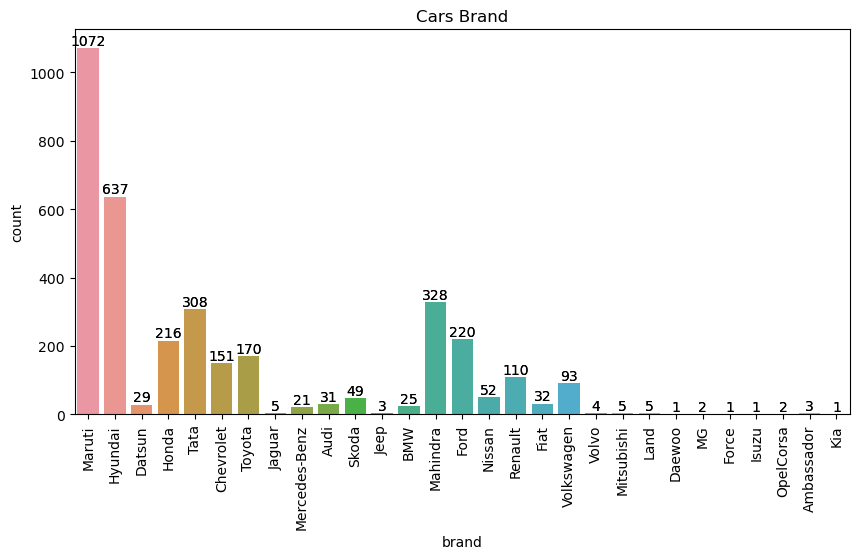

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.brand)
plt.title("Cars Brand")
plt.xticks(rotation=90)
ax=sns.countplot(x='brand',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

##### all numerical columns pair plot

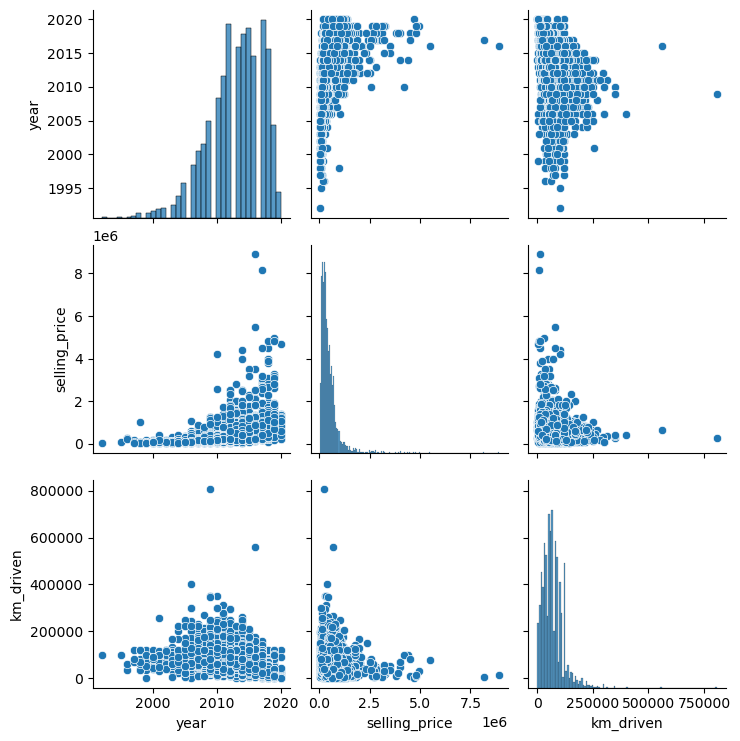

In [23]:
sns.pairplot(df)

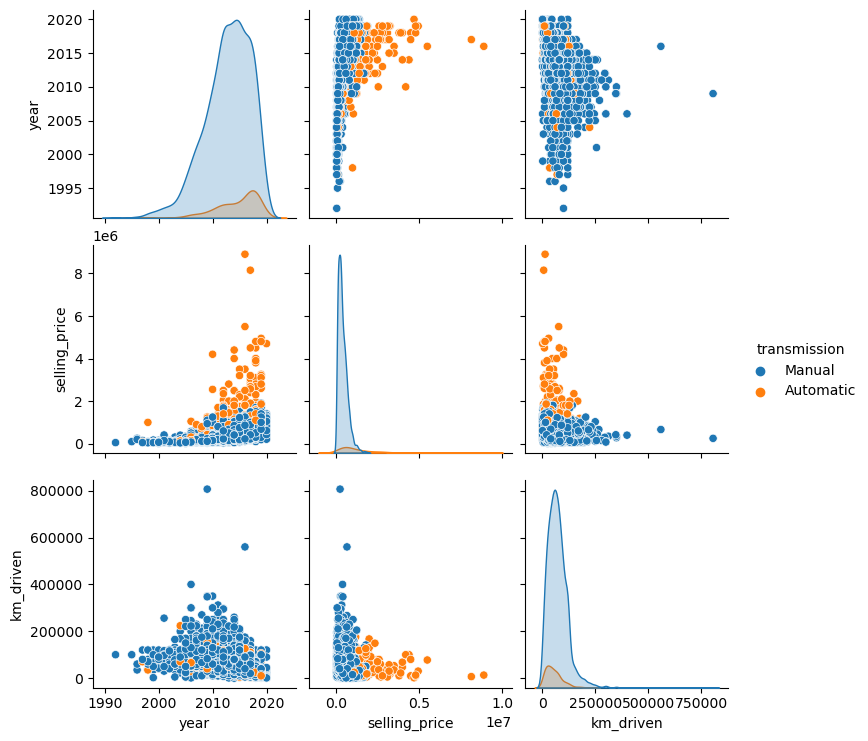

In [24]:
sns.pairplot(df,hue='transmission')

In [25]:
df.year.value_counts()

2017    346
2012    338
2015    332
2014    321
2013    298
2018    295
2016    283
2011    247
2010    210
2009    169
2019    162
2008    129
2007    117
2006     93
2005     61
2020     45
2004     38
2003     22
2002     18
2001     16
2000     12
1998      9
1999      9
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

##### ploting count of the years

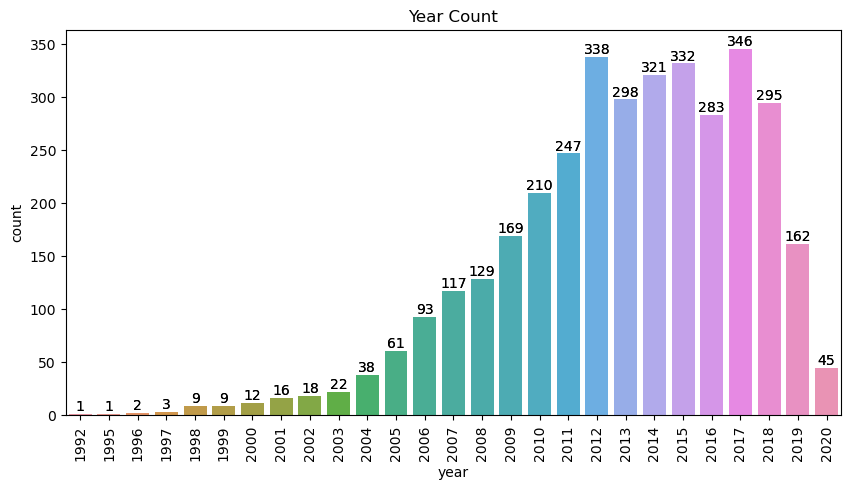

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.year)
plt.title("Year Count")
plt.xlabel("year")
plt.xticks(rotation=90)
ax=sns.countplot(x='year',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

##### ploting count of fuel types

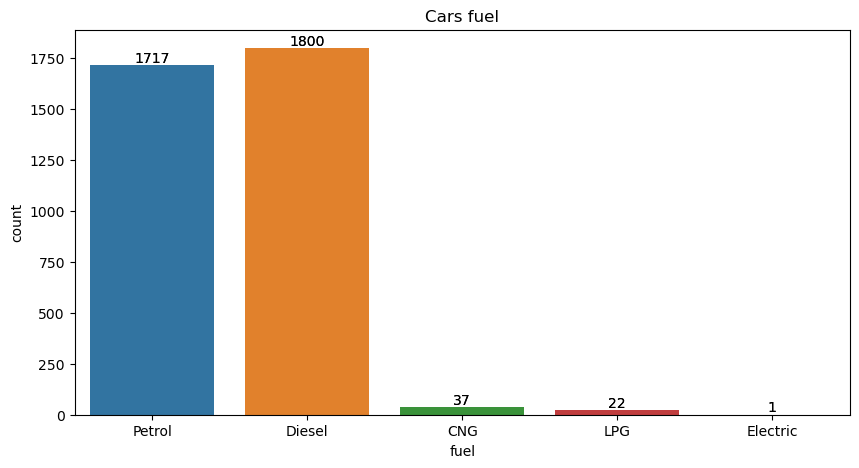

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.fuel)
plt.title("Cars fuel")

ax=sns.countplot(x='fuel',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

##### ploting count of owner types

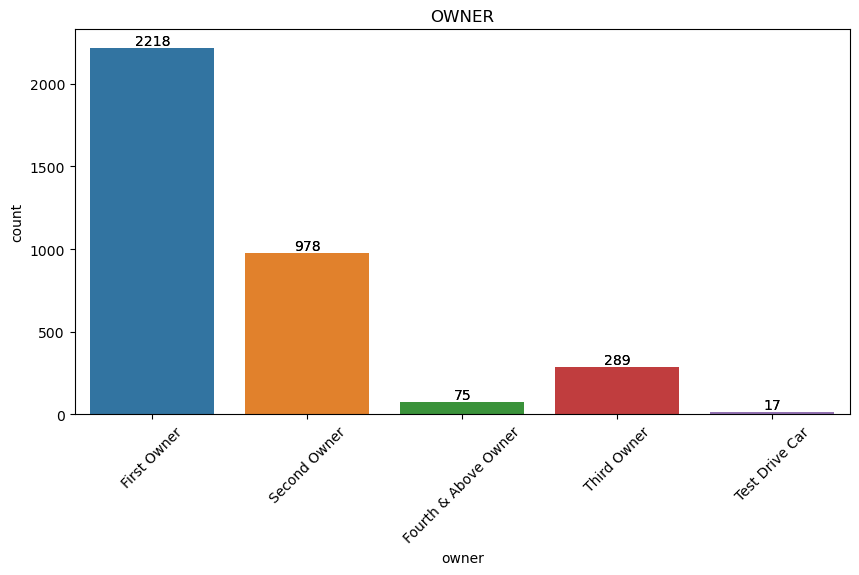

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.owner)
plt.title("OWNER")
plt.xticks(rotation=45)
ax=sns.countplot(x='owner',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

#### how does the year effect the price of sell?

In [17]:
# selling price convert into multiplus of 10 thousands form
selling_price=df.selling_price/10000

In [18]:
selling_price

0        6.0000
1       13.5000
2       60.0000
3       25.0000
4       45.0000
         ...   
4335    40.9999
4336    40.9999
4337    11.0000
4338    86.5000
4339    22.5000
Name: selling_price, Length: 3577, dtype: float64

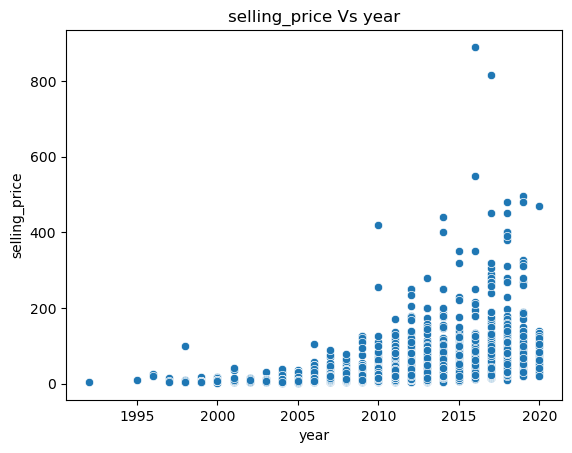

In [27]:
sns.scatterplot(y=selling_price,x=df.year)
plt.title("selling_price Vs year")
plt.show()

##### ploting count of selling types

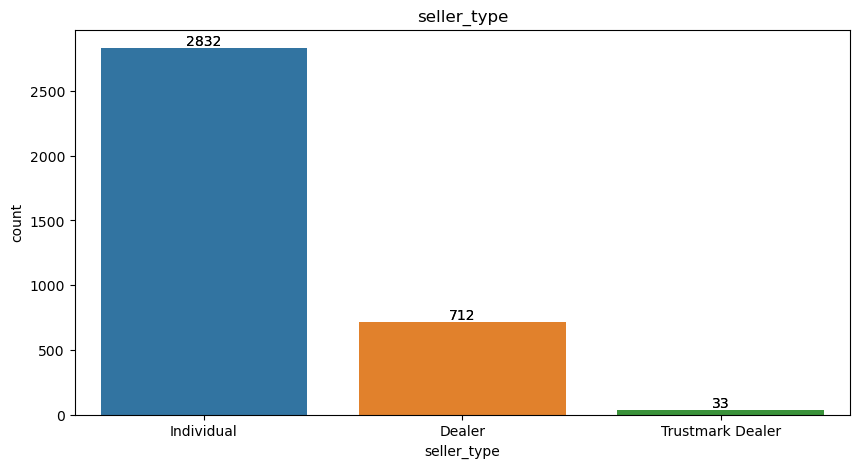

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.seller_type)
plt.title("seller_type")
ax=sns.countplot(x='seller_type',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

##### ploting count of transmission

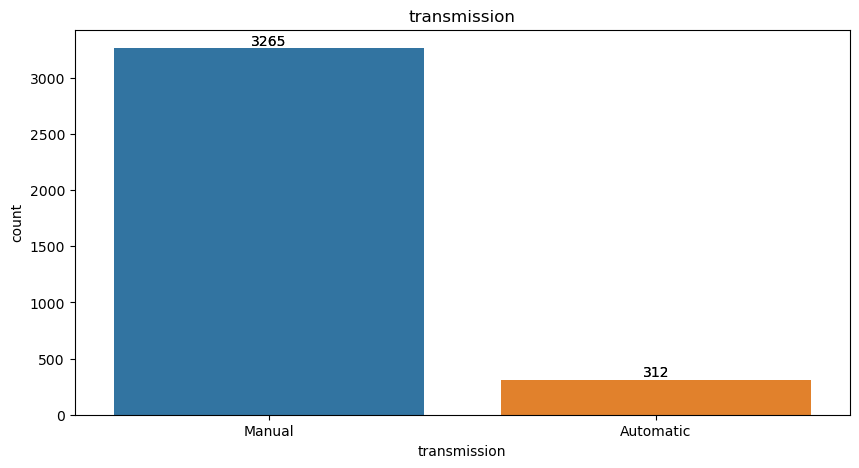

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.transmission)
plt.title("transmission")
ax=sns.countplot(x='transmission',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

##### Correlation Between selling_price and km_driven


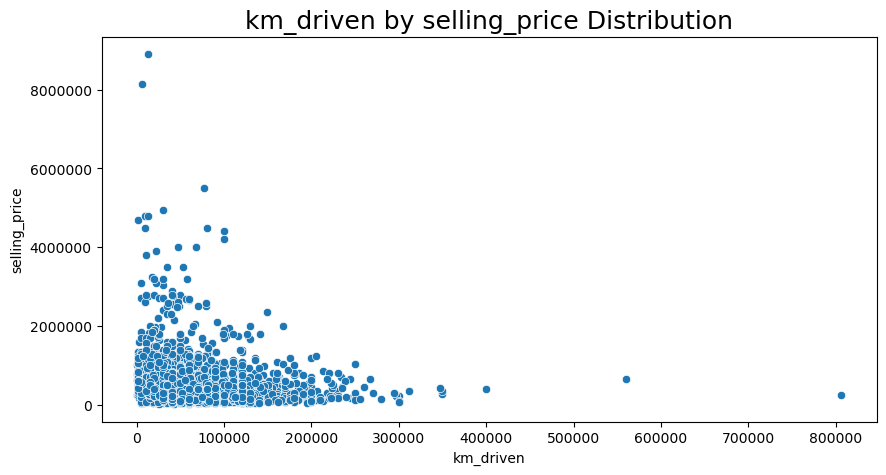

In [30]:
plt.figure(figsize=(10,5))
plt.title('km_driven by selling_price Distribution', fontsize=18)
sns.scatterplot(data=df, x='km_driven', y='selling_price')

plt.ticklabel_format(style='plain', axis='y')


##### ploting corelation 

<AxesSubplot:>

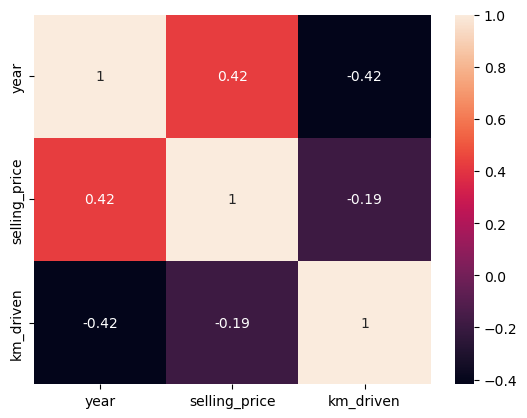

In [31]:
sns.heatmap(df.corr(),annot=True)

### Data prepration Model

In [19]:
df2=df.copy

In [20]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand', 'model', 'sub_class'],
      dtype='object')

In [21]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,sub_class
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon,R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,VX i-DTEC


In [22]:
df.drop(['sub_class'],axis=1,inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


In [23]:
df.drop(['model'],axis=1,inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [24]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand'],
      dtype='object')

In [25]:
df.shape

(3577, 8)

## Applying one hot encoding

In [26]:
dummy_df=pd.get_dummies(df)

In [27]:
dummy_df

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,60000,70000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,135000,50000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,600000,100000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,250000,46000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,450000,141000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4336,2014,409999,80000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4337,2009,110000,83000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,2016,865000,90000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
dummy_df.shape

(3577, 47)

In [29]:
pd.get_dummies(df,drop_first=True)

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,60000,70000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,135000,50000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4336,2014,409999,80000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4337,2009,110000,83000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,2016,865000,90000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Spliting data into training and test set

In [30]:
x=dummy_df.drop('selling_price',axis=1)

In [31]:
x

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,70000,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,50000,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,100000,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,46000,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,141000,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,80000,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4336,2014,80000,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4337,2009,83000,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4338,2016,90000,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y=dummy_df['selling_price']

In [33]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 3577, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

# Assuming x and y are your feature and target variable, respectively
# Your data preprocessing and feature engineering steps would go here

# Check the lengths of x and y
print(len(x))
print(len(y))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)


3577
3577


In [35]:
x_train, x_test, y_train, y_test

(      year  km_driven  fuel_CNG  fuel_Diesel  fuel_Electric  fuel_LPG  \
 3078  2011     120000         0            1              0         0   
 2702  2012      26000         0            1              0         0   
 2381  2015      55000         0            1              0         0   
 693   2016      80000         0            1              0         0   
 3529  2015     146000         0            1              0         0   
 ...    ...        ...       ...          ...            ...       ...   
 1941  2004     100000         0            0              0         0   
 1968  2011      50000         0            0              0         0   
 500   2016     155201         0            1              0         0   
 2467  2012      60236         0            1              0         0   
 3658  2013      75000         0            1              0         0   
 
       fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
 3078            0                   0      

In [36]:
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (2861, 46)
X_test: (716, 46)
y_train: (2861,)
y_test: (716,)


## Features Scaling 

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()

In [55]:
scaler.fit(x_train)

StandardScaler()

In [56]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [57]:
# Create DataFrames with columns
x_train_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Check the first few rows of the DataFrames
print(x_train_df.head())
print(x_test_df.head())

       year  km_driven  fuel_CNG  fuel_Diesel  fuel_Electric  fuel_LPG  \
0 -0.471714   1.090132 -0.104662     0.995466            0.0  -0.07957   
1 -0.234572  -0.917559 -0.104662     0.995466            0.0  -0.07957   
2  0.476853  -0.298165 -0.104662     0.995466            0.0  -0.07957   
3  0.713995   0.235796 -0.104662     0.995466            0.0  -0.07957   
4  0.476853   1.645451 -0.104662     0.995466            0.0  -0.07957   

   fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
0    -0.961927           -0.500437                 0.51514   
1    -0.961927           -0.500437                 0.51514   
2    -0.961927            1.998254                -1.94122   
3    -0.961927           -0.500437                 0.51514   
4    -0.961927            1.998254                -1.94122   

   seller_type_Trustmark Dealer  ...  brand_Mercedes-Benz  brand_Mitsubishi  \
0                     -0.097607  ...            -0.081764         -0.041841   
1                     -0

In [58]:
x_train_df.describe().round(2)

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
count,2861.00,2861.00,2861.00,2861.0,2861.0,2861.00,2861.00,2861.0,2861.00,2861.00,...,2861.00,2861.00,2861.00,2861.00,2861.00,2861.00,2861.00,2861.00,2861.00,2861.00
mean,-0.00,0.00,-0.00,0.0,0.0,0.00,0.00,0.0,-0.00,-0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.0,0.0,1.00,1.00,1.0,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-4.98,-1.47,-0.10,-1.0,0.0,-0.08,-0.96,-0.5,-1.94,-0.10,...,-0.08,-0.04,-0.13,-0.03,-0.18,-0.12,-0.31,-0.22,-0.17,-0.04
25%,-0.71,-0.70,-0.10,-1.0,0.0,-0.08,-0.96,-0.5,0.52,-0.10,...,-0.08,-0.04,-0.13,-0.03,-0.18,-0.12,-0.31,-0.22,-0.17,-0.04
50%,0.00,-0.17,-0.10,1.0,0.0,-0.08,-0.96,-0.5,0.52,-0.10,...,-0.08,-0.04,-0.13,-0.03,-0.18,-0.12,-0.31,-0.22,-0.17,-0.04
75%,0.71,0.45,-0.10,1.0,0.0,-0.08,1.04,-0.5,0.52,-0.10,...,-0.08,-0.04,-0.13,-0.03,-0.18,-0.12,-0.31,-0.22,-0.17,-0.04
max,1.66,15.75,9.55,1.0,0.0,12.57,1.04,2.0,0.52,10.25,...,12.23,23.90,7.91,37.81,5.49,8.29,3.20,4.51,6.01,26.73


##  Model Evaluation

In [89]:
from sklearn.metrics import *

In [90]:
def model_eval(x_train,x_test,y_train,y_test,model,mname):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    mae=mean_absolute_error(y_test,ypred)
    mse=mean_squared_error(y_test,ypred)
    rmse=np.sqrt(mse)
    train_scr=model.score(x_train,y_train)
    test_scr=model.score(x_test,y_test)
    res=pd.DataFrame({"Train_scr":train_scr,"Test_scr":test_scr,'RMSE':rmse,'MSE':mse,
                    "MAE":mae},index=[mname])
    return res
    
def mscore(model):
    train_scr=model.score(x_train,y_train)
    test_scr=model.score(x_test,y_test)
    print("Training Score",train_scr)
    print("Testing Score",test_scr)


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
x.head()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,70000,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,50000,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,100000,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,46000,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,141000,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2682, 46)
(895, 46)
(2682,)
(895,)


In [94]:
print(x.columns)

Index(['year', 'km_driven', 'fuel_CNG', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'brand_Ambassador',
       'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo',
       'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar',
       'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mitsubishi',
       'brand_Nissan', 'brand_OpelCorsa', 'brand_Renault', 'brand_Skoda',
       'brand_Tata', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')


In [95]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

## linear Regression

In [96]:
lg=LinearRegression()
lg_res=model_eval(x_train,x_test,y_train,y_test,lg,"Linear")
lg_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Linear,0.640987,0.625082,277079.445306,7.677302e+10,173418.33341


## Ridge Regression

In [97]:
rd=Ridge(0.75)
rd_res=model_eval(x_train,x_test,y_train,y_test,rd,"Ridge")
rd_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Ridge,0.639284,0.627576,276156.305652,7.626231e+10,173932.885676


## Lasso

In [98]:
ls=Lasso(alpha=0.8)
ls_res=model_eval(x_train,x_test,y_train,y_test,rd,"Lasso")
ls_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Lasso,0.639284,0.627576,276156.305652,7.626231e+10,173932.885676


## DecisionTreeRegressor

In [99]:
dt=DecisionTreeRegressor(max_depth=10,min_samples_split=10,random_state=40)
dt_res=model_eval(x_train,x_test,y_train,y_test,dt,"Decision Tree")
dt_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Decision Tree,0.759999,0.583758,291950.481368,8.523508e+10,160529.58527


## BaggingRegressor for Decision Tree

In [115]:
# Create the BaggingRegressor
bg1 = BaggingRegressor(n_estimators=100, base_estimator=dt, max_features=x_train.shape[1], max_samples=x_train.shape[0])

# Fit the model
bg1.fit(x_train, y_train)

# Make predictions
predictions = bg1.predict(x_test)
bag1_res=model_eval(x_train,x_test,y_train,y_test,dt,"Bagging for DT")
bag1_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Bagging for DT,0.759999,0.583758,291950.481368,8.523508e+10,160529.58527


## AdaBoostRegressor for DEcision Tree

In [102]:
adboost1=AdaBoostRegressor(n_estimators=45)
ada1_res=model_eval(x_train,x_test,y_train,y_test,dt,"AddaBoost for DT")
ada1_res

,Train_scr,Test_scr,RMSE,MSE,MAE
AddaBoost for DT,0.759999,0.583758,291950.481368,8.523508e+10,160529.58527


## RandomForestRegressor

In [103]:
rf=RandomForestRegressor(n_estimators=60,max_depth=14,min_samples_split=7)
rf_res=model_eval(x_train,x_test,y_train,y_test,dt,"Random Forest")
rf_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Random Forest,0.759999,0.583758,291950.481368,8.523508e+10,160529.58527


## BaggingRegressor for RandomForestRegressor

In [116]:
# Create a RandomForestRegressor directly
rf = RandomForestRegressor(n_estimators=80, max_features=x_train.shape[1], random_state=0)

# Fit the model
rf.fit(x_train, y_train)

# Make predictions
predictions = rf.predict(x_test)
bag2_res=model_eval(x_train,x_test,y_train,y_test,dt,"Bagging for RF")
bag2_res


,Train_scr,Test_scr,RMSE,MSE,MAE
Bagging for RF,0.759999,0.583758,291950.481368,8.523508e+10,160529.58527


## AdaBoostRegressor for RandomForestRegressor

In [106]:
adaboost2=AdaBoostRegressor(n_estimators=120)
ada2_res=model_eval(x_train,x_test,y_train,y_test,rf,"AdaBoost for RF")
ada2_res

,Train_scr,Test_scr,RMSE,MSE,MAE
AdaBoost for RF,0.856569,0.732001,234262.707443,5.487902e+10,138771.396774


## KNeighborsRegressor

In [107]:
Knn1=KNeighborsRegressor(n_neighbors=5)
knn1_res=model_eval(x_train,x_test,y_train,y_test,Knn1,"KNeighbours")
knn1_res

,Train_scr,Test_scr,RMSE,MSE,MAE
KNeighbours,0.429181,0.004778,451436.032237,2.037945e+11,249125.330503


In [108]:
def optimal_K():
    k = list(range(3,40,2)) # k= 3,5,7,9....,35,37,39
    acc = []
    for i in range(len(k)):
        knn_model = KNeighborsRegressor(n_neighbors=k[i])
        knn_model.fit(x_train,y_train)
        acc.append(knn_model.score(x_test,y_test))
    print('Accuracy\n',acc)
    plt.plot(k,acc,color='maroon',marker='o')
    plt.xlabel('Num of Nearest Nerighbors')
    plt.ylabel('Test accuarcy')
    plt.grid()
    plt.show()

Accuracy
 [-0.0027976510246443542, 0.004778188410675233, 0.07757046668527001, 0.10535116054475568, 0.11875875125184099, 0.1238196002215517, 0.1550770742392803, 0.15082602948093904, 0.14883914387539754, 0.15088802298234916, 0.1526997322771103, 0.1488271234223285, 0.14712155149288997, 0.14601567374480295, 0.14622468858640614, 0.1480448528319832, 0.15109342451752694, 0.15115012118580518, 0.15016118627837216]


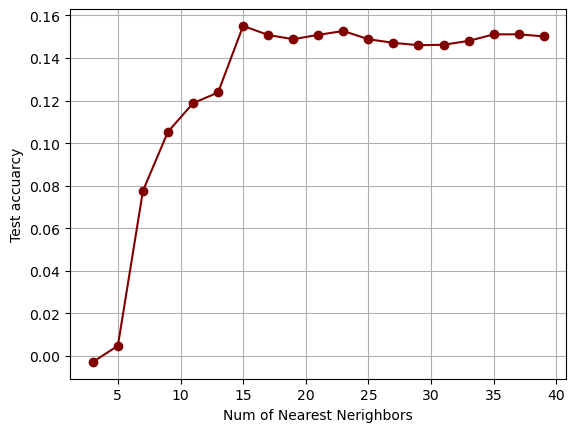

In [109]:
optimal_K()

## BaggingRegressor for KNeighborsRegressor

In [111]:
bag3=BaggingRegressor(n_estimators=25)
bag3_res=model_eval(x_train,x_test,y_train,y_test,Knn1,"Bagging for KN")
bag3_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Bagging for KN,0.429181,0.004778,451436.032237,2.037945e+11,249125.330503


## AdaBoostRegressor for KNeighborsRegressor

In [112]:
adaboost3=AdaBoostRegressor(n_estimators=70)
ada3_res=model_eval(x_train,x_test,y_train,y_test,Knn1,"AdaBoost for KN")
ada3_res.round(5)

,Train_scr,Test_scr,RMSE,MSE,MAE
AdaBoost for KN,0.42918,0.00478,451436.03224,2.037945e+11,249125.3305


In [117]:
res=pd.concat([lg_res,rd_res,ls_res,dt_res,bag1_res,ada1_res,rf_res,bag2_res,ada2_res,
               knn1_res,bag3_res,ada3_res])
res.round(3)


,Train_scr,Test_scr,RMSE,MSE,MAE
Linear,0.641,0.625,277079.445,7.677302e+10,173418.333
Ridge,0.639,0.628,276156.306,7.626231e+10,173932.886
Lasso,0.639,0.628,276156.306,7.626231e+10,173932.886
Decision Tree,0.760,0.584,291950.481,8.523508e+10,160529.585
Bagging for DT,0.760,0.584,291950.481,8.523508e+10,160529.585
AddaBoost for DT,0.760,0.584,291950.481,8.523508e+10,160529.585
Random Forest,0.760,0.584,291950.481,8.523508e+10,160529.585
Bagging for RF,0.760,0.584,291950.481,8.523508e+10,160529.585
AdaBoost for RF,0.857,0.732,234262.707,5.487902e+10,138771.397
KNeighbours,0.429,0.005,451436.032,2.037945e+11,249125.331


## Hyper Parameter Tunning

In [120]:
from sklearn.model_selection import GridSearchCV


In [ ]:

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 10,15,20],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_rf_model = grid_search.best_estimator_
accuracy = best_rf_model.score(x_test, y_test)
print(f"Accuracy on the test set: {accuracy:.2f}")

In [119]:
rf1=RandomForestRegressor(n_estimators=200,max_depth=15,min_samples_split=5,min_samples_leaf=1)
rf_res=model_eval(x_train,x_test,y_train,y_test,rf1,"Random Forest")
rf_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Random Forest,0.889673,0.734387,233217.556025,5.439043e+10,139206.870178


In [ ]:
bg4=BaggingRegressor(n_estimators=200,estimator=rf1,max_features=x_train.shape[1],
                        max_samples=x_train.shape[0])
bag1_res=model_eval(x_train,x_test,y_train,y_test,rf1,"Bagging for Rf")
bag1_res

In [ ]:
add5=BaggingRegressor(n_estimators=100,estimator=rf1)
bag1_res=model_eval(x_train,x_test,y_train,y_test,rf1,"adda for rf")
bag1_res

## Choosing the Best model

In [ ]:
import pickle

In [ ]:
final_model=RandomForestRegressor(n_estimators=200,max_depth=15,min_samples_split=5,min_samples_leaf=1)
final_model.fit(x_train,y_train)

In [ ]:
pickle.dump(final_model,open('final.pkl','wb'))

## Analysing data in Details for Web Devolp

In [ ]:
df2=pd.read_csv(r'C:\Users\hp\Downloads\CAR DETAILS (1).csv')
df2.head()

In [ ]:
brand=set(brand)
print(brand)

In [ ]:
fuel=set(df2['fuel'])
fuel

In [ ]:
car_name=list(df2['name'])
#print(car_names)
print(len(car_names))

In [ ]:
brand,model,sub_class=[],[],[]
for car in car_name:
    parts=car.split()
    x=parts[0]
    y=parts[1]
    z=parts[2:]
    brand.append(x)
    model.append(y)
    sub_class.append(z)
    
print(len(brand))
print(len(model))
print(len(sub_class))

In [ ]:
sub_class=[' '.join(map(str, item)) for item in sub_class]

In [ ]:
df2['brand1']=brand
df2['model1']=model
df2.head()

In [ ]:
df2.columns

In [ ]:
seller_type=set(df2['seller_type'])
seller_type

In [ ]:
transmission=set(df2['transmission'])
transmission

In [ ]:
owner=set(df2['owner'])
owner

In [ ]:
model=set(df2['model1'])
print(model)